In [2]:
import pandas as pd
import os
import numpy as np
from sklearn.cluster import KMeans


random_seed = 42

df = pd.read_csv('../../data/utils/group_info.csv')
base_path = '../../data'
# Apply logarithm to area and volume
df['log_area'] = np.log(df['area']) / np.log(2)
df['log_Depth_avg'] = np.log(df['Depth_avg']) / np.log(2)

# First round of KMeans clustering
initial_kmeans = KMeans(n_clusters=2, random_state=random_seed)
df['cluster'] = initial_kmeans.fit_predict(df[['log_area', 'log_Depth_avg']])

def re_cluster(df, parent_cluster_label, n_clusters, offset, random_seed):
    cluster_data = df[df['cluster'] == parent_cluster_label]
    
    re_cluster_kmeans = KMeans(n_clusters=n_clusters, random_state=random_seed)
    re_cluster_labels = re_cluster_kmeans.fit_predict(cluster_data[['log_area', 'log_Depth_avg']])
    new_labels = offset + re_cluster_labels
    df.loc[cluster_data.index, 'cluster'] = new_labels

# Second round of clustering on the largest cluster from the first round
largest_cluster = df['cluster'].value_counts().idxmax()
re_cluster(df, largest_cluster, 2, offset=2, random_seed=random_seed)

# Find new largest cluster for the third round
# Exclude previously re-clustered clusters (offset >= 2)
third_round_candidates = df[df['cluster'] > 0]
third_largest_cluster = third_round_candidates['cluster'].value_counts().idxmax()
re_cluster(df, third_largest_cluster, 2, offset=4, random_seed=random_seed)

output_path = os.path.join(base_path, 'utils/groups/vol_area')
os.makedirs(output_path, exist_ok=True)  # Create the directory if it doesn't exist

cluster_num = df['cluster'].value_counts().shape[0]
for i in range(cluster_num):
    cluster_id = df['cluster'].value_counts().index[i]
    print("cluster_id:", cluster_id)
    cluster_data = df[df['cluster'] == cluster_id]
    cluster_ids = cluster_data
    output_file = os.path.join(output_path, f'cluster_{i + 1}.csv')
    df.loc[df['cluster'] == cluster_id, 'cluster'] = -(i + 1)
    cluster_ids['cluster'] = (i + 1)
    cluster_ids.to_csv(output_file, index=False)
    print(f'Saved cluster {cluster_id} data to {output_file}')

print(df['cluster'].value_counts())


save_path = '../../data/utils/ids.csv'
df['cluster'] = -df['cluster']
df[['nhdhr_id', 'cluster']].to_csv(save_path, index=False)

cluster_id: 2
Saved cluster 2 data to ../../data/utils/groups/vol_area/cluster_1.csv
cluster_id: 1
Saved cluster 1 data to ../../data/utils/groups/vol_area/cluster_2.csv
cluster_id: 5
Saved cluster 5 data to ../../data/utils/groups/vol_area/cluster_3.csv
cluster_id: 4
Saved cluster 4 data to ../../data/utils/groups/vol_area/cluster_4.csv
cluster
-1    115
-2    112
-3     78
-4     70
Name: count, dtype: int64


/home/chonghao/anaconda3/envs/oxygen_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/chonghao/anaconda3/envs/oxygen_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/chonghao/anaconda3/envs/oxygen_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/tmp/ipykernel_612876/1942652729.py:48: SettingWithCopyWarning: 
A value is trying to be set on a

In [ ]:
total_count = len(df)
print(f"总数据数量: {total_count}")

N_area = 5
N_depth = 5

# 使用qcut进行分桶，并添加新列
df['area_index'] = pd.qcut(df['area'], q=N_area, labels=range(1, N_area+1))
df['depth_index'] = pd.qcut(df['Depth_avg'], q=N_depth, labels=range(1, N_depth+1))

old_min = df['area'].min()
old_max = df['area'].max()
new_min = 24
new_max = 50

# Mapping
df['area_mapping'] = new_min + ((df['area'] - old_min) * (new_max - new_min) / (old_max - old_min))

# 查看结果
print(df[['area', 'area_mapping']])

outer_size_range = [18, 24, 30, 36, 42]
alpha_range_main_sub = [0.20, 0.25, 0.35, 0.45, 0.55]


# Main Figure
outer_size_range_main = [14, 22, 25, 31, 40]
alpha_range_main = [0.1, 0.25, 0.4, 0.5, 0.65]

# colors_2 = ['#87bcf5', '#4b88f2', '#3a61f0', '#2444b5', '#0f1d70'] # Blue
# colors_1 = ['#f57856', '#ff5526', '#e32614', '#ba2214', '#a31407'] # Red
# colors_3 = ['#f2e055', '#fcd649', '#f0c630', "#d9ac0b", '#e69812'] # Yellow
# colors_4 = ['#89f562', '#5ed932', '#2dbd26', "#1e8f18", '#0b8704'] # Green


cluster_name = ['Kohlman Lake', 'Lake Minnetonka', 'Gervais Lake', 'Bde Maka Ska']

/tmp/ipykernel_612876/2915325614.py:78: UserWarning: The label '_child56' of <matplotlib.lines.Line2D object at 0x7faffda74370> starts with '_'. It is thus excluded from the legend.
  plt.legend(handles=legend_handles, title_fontsize = 30, loc='upper left',  fontsize= 32)
/tmp/ipykernel_612876/2915325614.py:78: UserWarning: The label '_child57' of <matplotlib.lines.Line2D object at 0x7faffda745e0> starts with '_'. It is thus excluded from the legend.
  plt.legend(handles=legend_handles, title_fontsize = 30, loc='upper left',  fontsize= 32)
/tmp/ipykernel_612876/2915325614.py:78: UserWarning: The label '_child401' of <matplotlib.lines.Line2D object at 0x7fafa809f220> starts with '_'. It is thus excluded from the legend.
  plt.legend(handles=legend_handles, title_fontsize = 30, loc='upper left',  fontsize= 32)
/tmp/ipykernel_612876/2915325614.py:78: UserWarning: The label '_child402' of <matplotlib.lines.Line2D object at 0x7fafa809ff40> starts with '_'. It is thus excluded from the legen

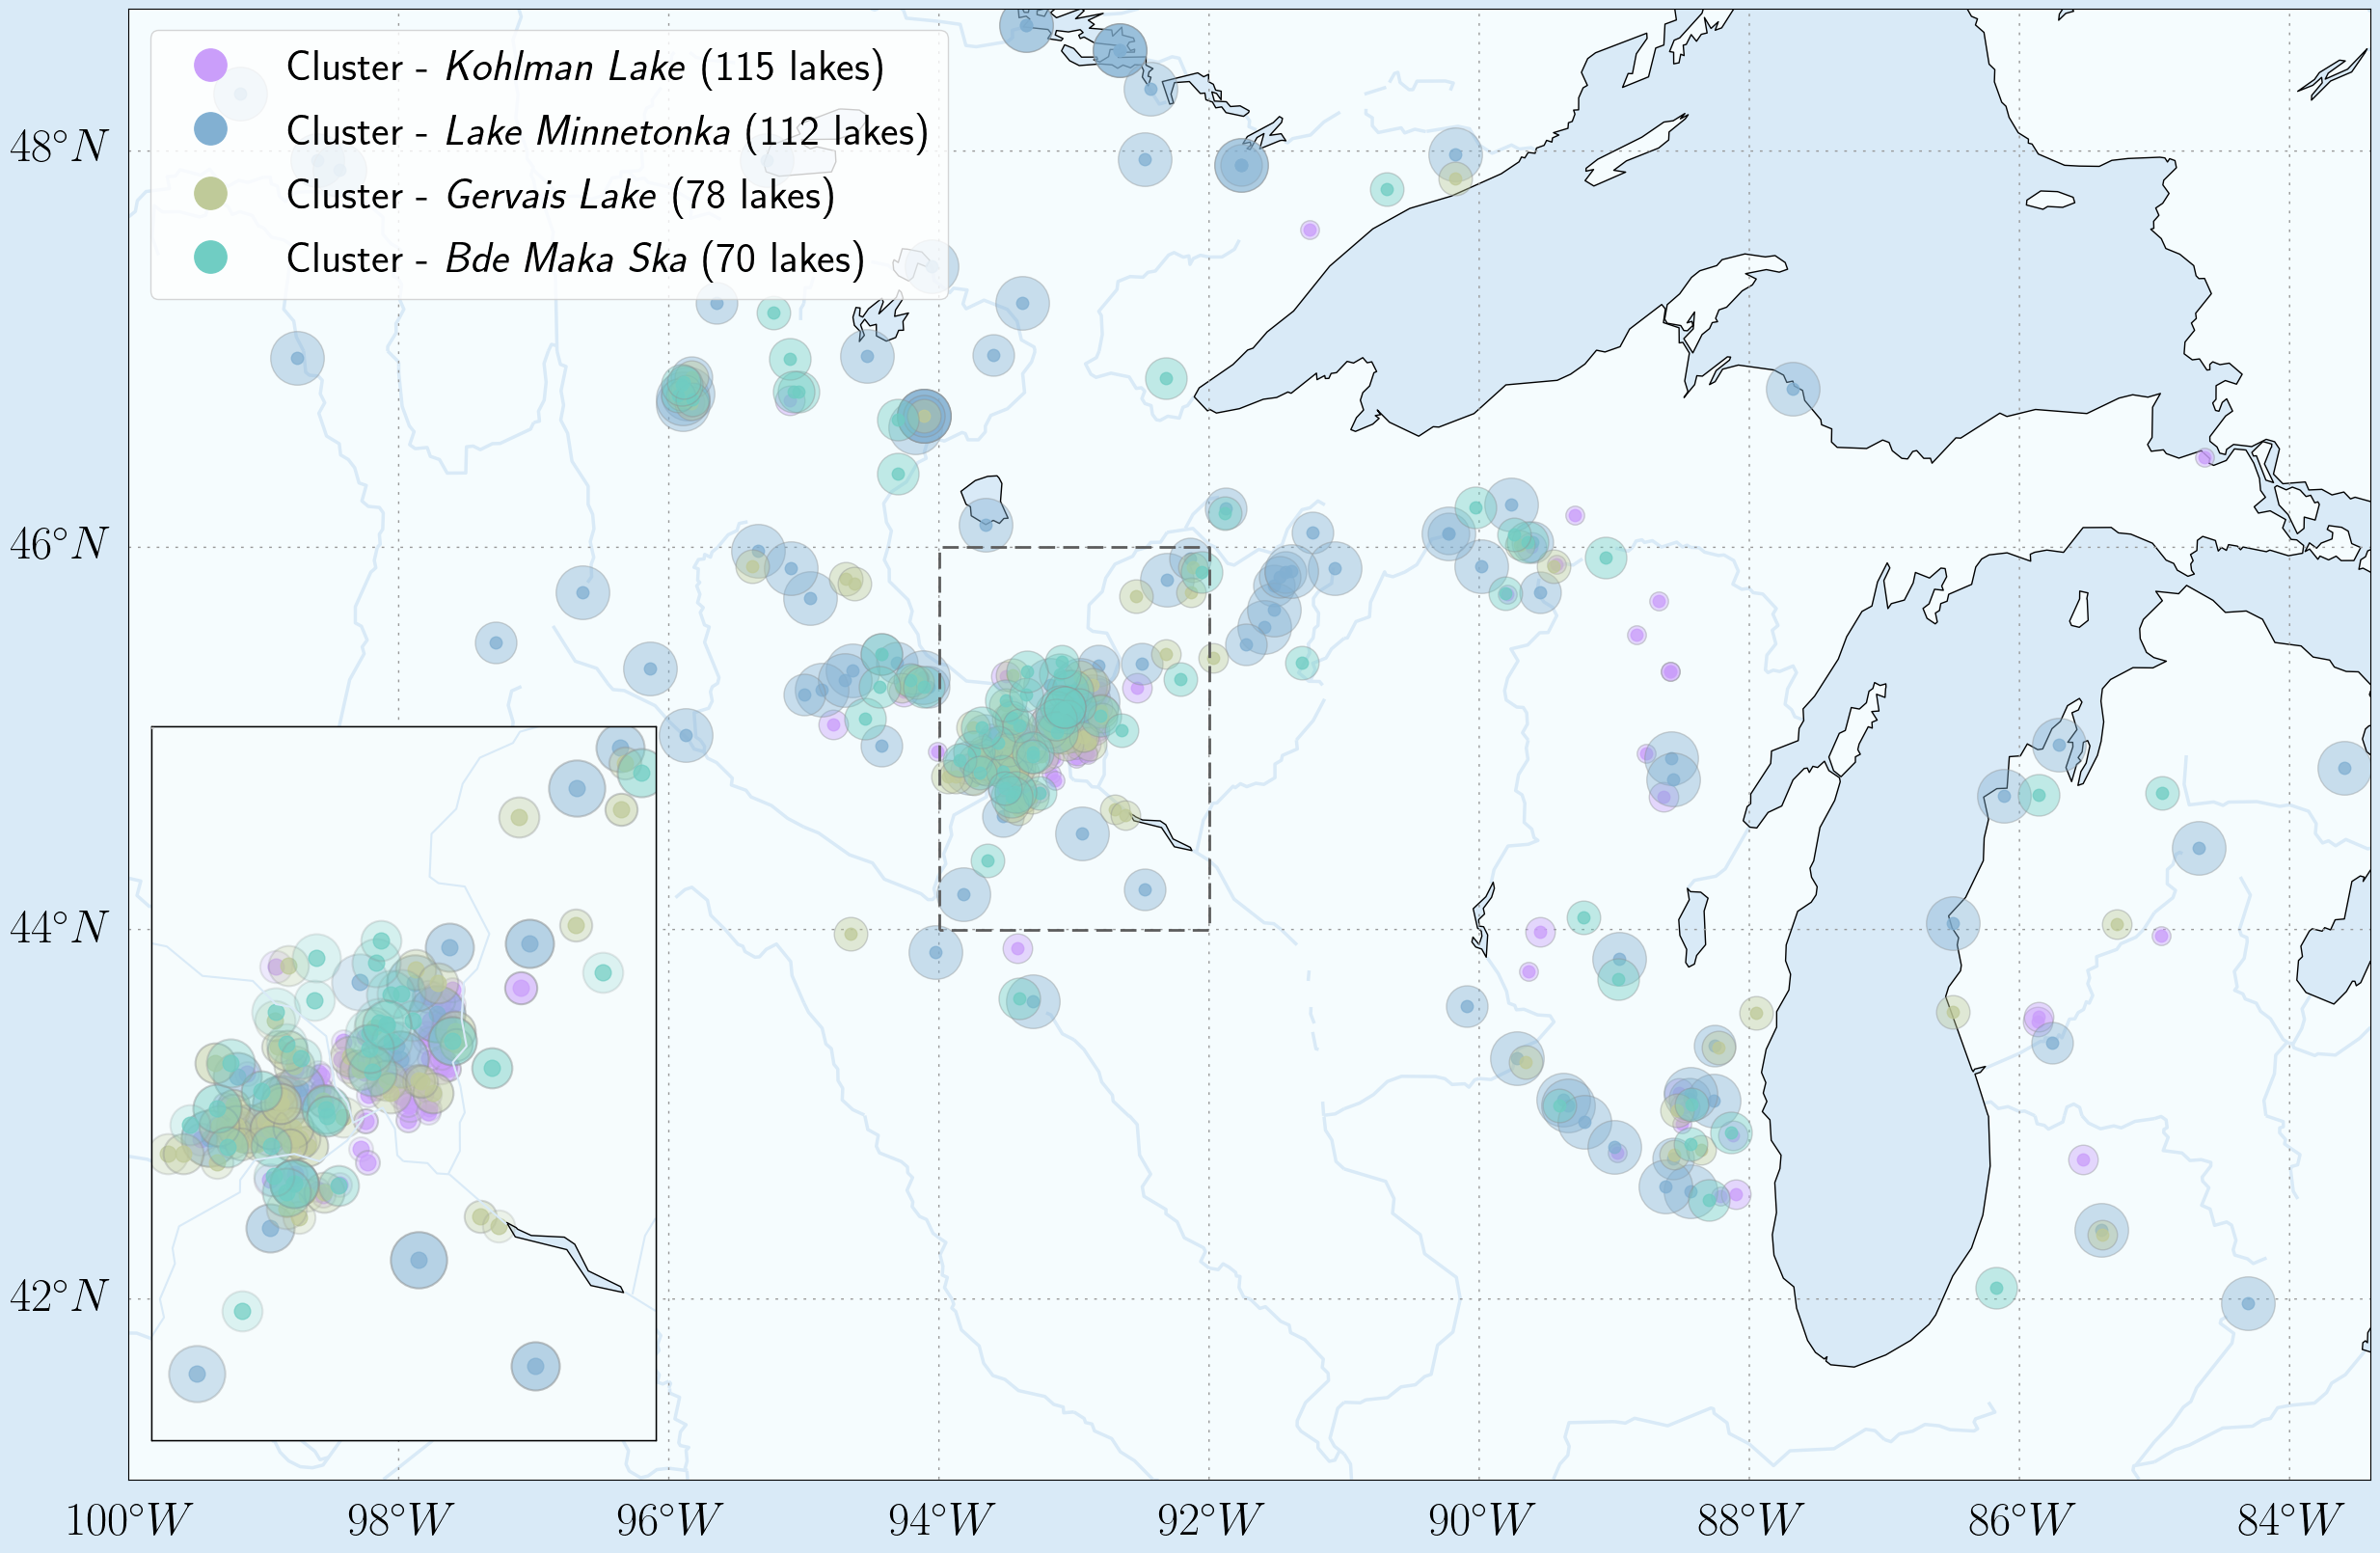

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import random

# Color
color = {'continent':'#F5FCFE'}

geometries = df['geometry']
geometries = pd.DataFrame([geo.split(';') for geo in geometries], columns=['lon', 'lat']).astype(float)

resolution = 'i'
# 创建一个图形实例
plt.figure(figsize=(30, 37), facecolor='#D9EAF7')

# 创建Basemap实例
m = Basemap(projection='merc', resolution=resolution, llcrnrlat=41, urcrnrlat=48.7, llcrnrlon=-100, urcrnrlon=-83.4)
m.drawrivers(color='#D9EAF7', linewidth=2.5, linestyle='solid')
m.drawcoastlines()
m.fillcontinents(color=color['continent'], lake_color='#D9EAF7')
m.drawparallels(range(10, 70, 2), labels=[1, 0, 0, 0], color='#999999', dashes=[2, 5], linewidth=1, fontsize=35) 
m.drawmeridians(range(-130, -50, 2), labels=[0, 0, 0, 1], color='#999999', dashes=[2, 5], linewidth=1, fontsize=35) 

# m.drawmapboundary(fill_color='lightblue') 
# m.drawstates(color='#A9B8C6')  # 绘制州界线

# colors = ['#2ca02c', '#ff7f0e', '#d62728', '#1f77b4']  
colors = ["#CA9EFA", "#82B0D2", '#BFCA99', '#70CDC3'] # Blue, 
markers = ['o', 'o', 'o', 'o']

# 用于存储每个聚类的图例句柄
legend_handles = []

# 存储每个聚类的点
cluster_points = {i: [] for i in range(6)}

for idx, (lon, lat) in enumerate(zip(geometries['lon'], geometries['lat'])):
    cluster_label = df['cluster'][idx]
    area = df['area_index'][idx]
    depth = df['depth_index'][idx]
    area_mapping = df['area_mapping'][idx]
    cluster_points[cluster_label].append((lon, lat, area, area_mapping, depth))

labels = []
plt.rcParams['text.usetex'] = True

for cluster_label, points in cluster_points.items():
    for lon, lat,  area, area_mapping, depth in points:
        x, y = m(lon, lat)  
        cluster_color = colors[(cluster_label-1) % len(colors)]  
        marker = markers[cluster_label % len(markers)]
        amount = df['cluster'].value_counts()[cluster_label]
        # handle_invisible, = m.plot([], [], marker, color=cluster_color, markersize=24, label=f'Cluster - {cluster_name[cluster_label - 1]} ({amount} lakes)', alpha=alpha_range_main[depth - 1])
        handle_invisible, = m.plot([], [], marker, color=cluster_color, markersize=24, label=r'Cluster - \textit{' + cluster_name[cluster_label - 1] + '} (' + str(amount) + ' lakes)', alpha=1)
        handle, = m.plot(x, y, marker, color=cluster_color, markersize=9, alpha=0.75)
        handle_outsize, = m.plot(x, y, marker, color=cluster_color, markersize=outer_size_range_main[area - 1], alpha=0.4, markeredgewidth=1, markeredgecolor='#8E9192')
        if legend_handles:
            if cluster_label not in labels:
                labels.append(cluster_label)
                legend_handles.append(handle)
                legend_handles.append(handle_outsize)
                legend_handles.append(handle_invisible)
        else:
            labels.append(cluster_label)
            legend_handles.append(handle)
            legend_handles.append(handle_outsize)
            legend_handles.append(handle_invisible)

lon_min, lon_max = -94, -92
lat_min, lat_max = 44, 46  
x_min, y_min = m(lon_min, lat_min)
x_max, y_max = m(lon_max, lat_max)
m.plot([x_min, x_min, x_max, x_max, x_min], [y_min, y_max, y_max, y_min, y_min],
       linestyle='--', linewidth=2, color='#5D5D5D', dashes=[6, 3])

# plt.legend(handles=legend_handles, title_fontsize = 30,title='Clusters', loc='upper left',  fontsize= 30)
plt.legend(handles=legend_handles, title_fontsize = 30, loc='upper left',  fontsize= 32)
# plt.title('375 Lakes', fontsize=30)

#----------------------------------------------------------------


inset_ax = plt.axes([0.12, 0.3, 0.2, 0.2])
inset_m = Basemap(projection='merc', resolution=resolution,
                  llcrnrlat=44, urcrnrlat=46, llcrnrlon=-94, urcrnrlon=-92,
                  ax=inset_ax)

legend_handles_inset = []
for cluster_label, points in cluster_points.items():
    for lon, lat,  area, area_mapping, depth in points:
        if lon >= lon_min and lon <= lon_max and lat >= lat_min and lat <= lat_max:
            x, y = inset_m(lon, lat)  
            cluster_color = colors[(cluster_label-1) % len(colors)]  
            marker = markers[cluster_label % len(markers)]
            amount = df['cluster'].value_counts()[cluster_label]
            handle, = inset_m.plot(x, y, marker, color=cluster_color, markersize=12, alpha=0.7)
            handle_outsize, = inset_m.plot(x, y, marker, color=cluster_color, markersize=outer_size_range[area - 1], markeredgewidth=1.5, alpha=alpha_range_main_sub[depth - 1], markeredgecolor='#8E9192')
            if legend_handles_inset:
                if cluster_label not in labels:
                    legend_handles_inset.append(handle)
                    legend_handles_inset.append(handle_outsize)
            else:
                legend_handles_inset.append(handle)
                legend_handles_inset.append(handle_outsize)
inset_ax.legend(handles=legend_handles_inset, loc='upper left', prop={'size': 0})  # Adjust font size as needed
inset_m.drawcoastlines()
inset_m.fillcontinents(color='#F6FCFD', lake_color='#D9EAF7')
inset_m.drawrivers(color='#D9EAF7', linewidth=1.5, linestyle='solid')
# inset_m.drawstates()
inset_m.drawmapboundary(fill_color='lightblue')
# inset_m.drawparallels(range(44, 46, 1), labels=[1, 0, 0, 0], color='#999999', dashes=[2, 5], linewidth=1) 
# inset_m.drawmeridians(range(-94, -92, 1), labels=[0, 0, 0, 1], color='#999999', dashes=[2, 5], linewidth=1) 

# plt.show()
# plt.subplots_adjust(left=0.15, right=0.95, top=1, bottom=0.15)  
file_path = '../../lakes.pdf' 
plt.savefig(file_path, format='pdf', dpi=300)  

